# Logisitic regression



Probability of the positive class
$ y = \frac{1}{1 + exp(-(w * x + \mu))} $

Defined Log loss

$  Log looss = \frac{1}{\text{number of points}}  -y log(y') - (1-y)log(1 -y') $

$Gradient = \frac{!}{numer of datapoints} (y - y') * X
$

In [5]:
import numpy as np
from sklearn.datasets import load_iris

data = load_iris
iris = load_iris()
X = iris.data
y = iris.target
y = np.array(y == 1, dtype = int)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [16]:
class LogisticRegression():
    def __init__(self, learning_rate = 0.01, max_epochs = 100, eps = 1e-9, fit_intercept = True):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.eps = eps
        self.fit_intercept = fit_intercept
        self.loss_history = []   # store training loss

    def fit(self, X, y):
        if self.fit_intercept:
            X = self._add_intercept(X)
        n, dim = X.shape
        self.theta = np.zeros(dim)
        self.loss_history = []   # reset history for each training

        for iter_idx in range(self.max_epochs):
            prev_theta = self.theta.copy()
            probs = _sigmoid(np.dot(X, self.theta))
            loss = (-y * np.log(probs) - (1-y) * np.log(1-probs)).mean()
            self.loss_history.append(loss)

            grads = (1/n) * np.dot(X.T, (probs - y))

            if iter_idx % 50 == 0:
                print(f"Epoch {iter_idx}, Loss: {loss:.4f}")

            self.theta -= grads * self.learning_rate

            if iter_idx > 10 and np.linalg.norm(prev_theta - self.theta) < self.eps:
                print('early stopping')
                break

    def predict(self, X, cutoff):
        if self.fit_intercept:
            X = self._add_intercept(X)
        bool_array = _sigmoid(np.dot(X, self.theta)) >= cutoff
        return bool_array

    def _add_intercept(self, x):
        intercept_term = np.ones(len(x))
        return np.column_stack((intercept_term, x))


In [17]:
def _sigmoid(x):
    return 1/(1 + np.exp(-x))


In [18]:
cls = LogisticRegression(learning_rate=0.01, max_epochs=3000, eps=1e-9, fit_intercept=True)
cls.fit(X_train, y_train)
preds = cls.predict(X_test, 0.5)


Epoch 0, Loss: 0.6931
Epoch 50, Loss: 0.6555
Epoch 100, Loss: 0.6290
Epoch 150, Loss: 0.6092
Epoch 200, Loss: 0.5939
Epoch 250, Loss: 0.5817
Epoch 300, Loss: 0.5718
Epoch 350, Loss: 0.5635
Epoch 400, Loss: 0.5566
Epoch 450, Loss: 0.5507
Epoch 500, Loss: 0.5457
Epoch 550, Loss: 0.5414
Epoch 600, Loss: 0.5377
Epoch 650, Loss: 0.5344
Epoch 700, Loss: 0.5315
Epoch 750, Loss: 0.5290
Epoch 800, Loss: 0.5268
Epoch 850, Loss: 0.5248
Epoch 900, Loss: 0.5230
Epoch 950, Loss: 0.5214
Epoch 1000, Loss: 0.5200
Epoch 1050, Loss: 0.5187
Epoch 1100, Loss: 0.5175
Epoch 1150, Loss: 0.5165
Epoch 1200, Loss: 0.5155
Epoch 1250, Loss: 0.5146
Epoch 1300, Loss: 0.5137
Epoch 1350, Loss: 0.5130
Epoch 1400, Loss: 0.5123
Epoch 1450, Loss: 0.5116
Epoch 1500, Loss: 0.5110
Epoch 1550, Loss: 0.5105
Epoch 1600, Loss: 0.5099
Epoch 1650, Loss: 0.5094
Epoch 1700, Loss: 0.5090
Epoch 1750, Loss: 0.5085
Epoch 1800, Loss: 0.5081
Epoch 1850, Loss: 0.5077
Epoch 1900, Loss: 0.5074
Epoch 1950, Loss: 0.5070
Epoch 2000, Loss: 0.506

In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(preds, y_test)

np.float64(0.7701863354037267)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(preds, y_test))


              precision    recall  f1-score   support

       False       0.90      0.83      0.86        23
        True       0.56      0.71      0.62         7

    accuracy                           0.80        30
   macro avg       0.73      0.77      0.74        30
weighted avg       0.82      0.80      0.81        30



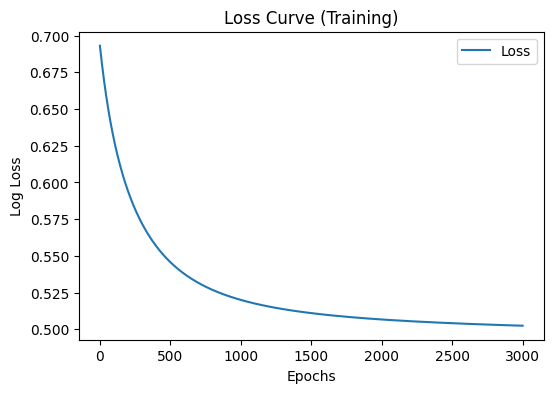

In [21]:
plt.figure(figsize=(6,4))
plt.plot(range(len(cls.loss_history)), cls.loss_history, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Loss Curve (Training)")
plt.legend()
plt.show()


In [22]:
# === prepare predicted probabilities once (binary prob for class 1) ===
import numpy as np
y_probs = _sigmoid(np.dot(cls._add_intercept(X_test), cls.theta))
y_pred = (y_probs >= 0.5).astype(int)


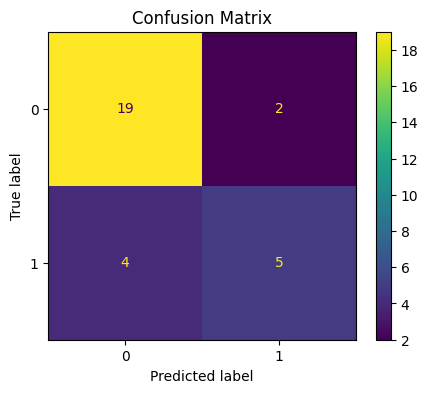

In [23]:
# 1) Confusion Matrix (nice visual)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
fig, ax = plt.subplots(figsize=(5,4))
disp.plot(ax=ax, values_format='d')
plt.title("Confusion Matrix")
plt.show()


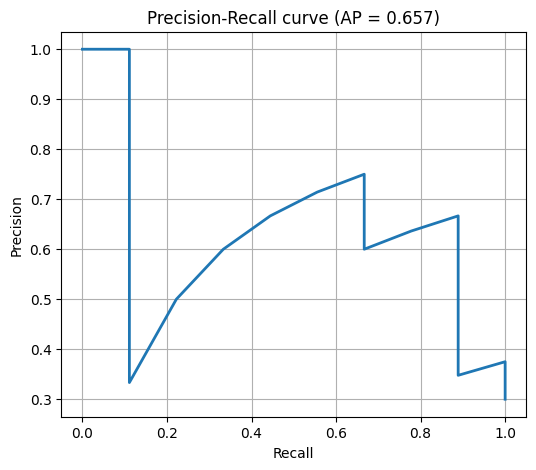

In [24]:
# 2) Precision-Recall curve + Average Precision
from sklearn.metrics import precision_recall_curve, average_precision_score

prec, rec, pr_thresh = precision_recall_curve(y_test, y_probs)
avg_prec = average_precision_score(y_test, y_probs)

plt.figure(figsize=(6,5))
plt.plot(rec, prec, lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall curve (AP = {avg_prec:.3f})")
plt.grid(True)
plt.show()


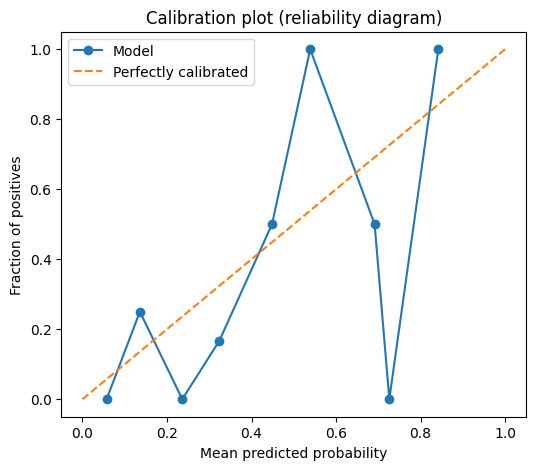

In [25]:
# 3) Calibration plot (reliability diagram)
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)

plt.figure(figsize=(6,5))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0,1],[0,1], linestyle='--', label='Perfectly calibrated')
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration plot (reliability diagram)")
plt.legend()
plt.show()


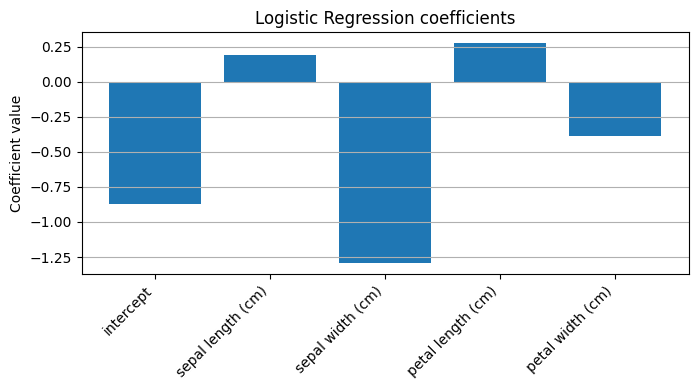

In [26]:
# 4) Coefficients bar plot (including intercept)
# feature labels - if iris available, otherwise generic names
try:
    feat_names = ['intercept'] + iris.feature_names
except:
    feat_names = ['intercept'] + [f'f{i}' for i in range(len(cls.theta)-1)]

coefs = cls.theta  # intercept first if fit_intercept True

plt.figure(figsize=(7,4))
plt.bar(range(len(coefs)), coefs)
plt.xticks(range(len(coefs)), feat_names, rotation=45, ha='right')
plt.ylabel("Coefficient value")
plt.title("Logistic Regression coefficients")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
